# STOCK MARKET PART 1 - VISUALIZATION OF INDIVIDUAL STOCKS

# DATA COLLECTION AND TRANSFORMATION -  using GOOGLE FINANCE

In [67]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [68]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2017, 1, 1)

In [117]:
from pandas_datareader.google.daily import GoogleDailyReader

@property
def url(self):
    return 'http://finance.google.com/finance/historical'

GoogleDailyReader.url = url

BOFA = data.get_data_google("BAC", start, end)

Citi= data.get_data_google("C",start, end)


GOld = data.get_data_google("GS", start, end)


JP = data.get_data_google("JPM", start, end)

AP=data.get_data_google("AAPL",start,end)

MS=data.get_data_google("MSFT",start,end)

In [118]:
tckr_LIST = ['BAC', 'C', 'GS', 'JPM','APPL','MSFT']

In [120]:
Stocks = pd.concat([BOFA, Citi, GOld, JP, AP,MS],axis=1,keys=tckr_LIST)

In [121]:
Stocks.columns.names = ['Ticker','Company Stock Info']

In [122]:

Stocks.head()

Ticker                BAC                                     C                \
Company Stock Info   Open   High    Low  Close    Volume   Open   High    Low   
Date                                                                            
2006-01-03          46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1   
2006-01-04          47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5   
2006-01-05          46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0   
2006-01-06          46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0   
2006-01-09          46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0   

Ticker                                 ...        APPL                       \
Company Stock Info  Close   Volume     ...        Open   High    Low  Close   
Date                                   ...                                    
2006-01-03          492.9  1537660     ...       10.34  10.68  10.32  10.68   
2006-01-04          483.8  1871020     ...       10.73  10.85  10.64  10.71   
2006-01-05          486.2  1143160     ...       10.69  10.70  10.54  10.63   
2006-01-06          486.2  1370250     ...       10.75  10.96  10.65  10.90   
2006-01-09          483.9  1680740     ...       10.96  11.03  10.82  10.86   

Ticker                            MSFT                                    
Company Stock Info       Volume   Open   High    Low  Close       Volume  
Date                                                                      
2006-01-03          201853036.0  26.25  27.00  26.10  26.84   79974418.0  
2006-01-04          155225609.0  26.77  27.08  26.77  26.97   57975661.0  
2006-01-05          112396081.0  26.96  27.13  26.91  26.99   48247610.0  
2006-01-06          176139334.0  26.89  27.00  26.49  26.91  100969092.0  
2006-01-09          168861224.0  26.93  27.07  26.76  26.86   55627836.0  

[5 rows x 30 columns]

# DATA VISUALIZATION AND ANALYSIS

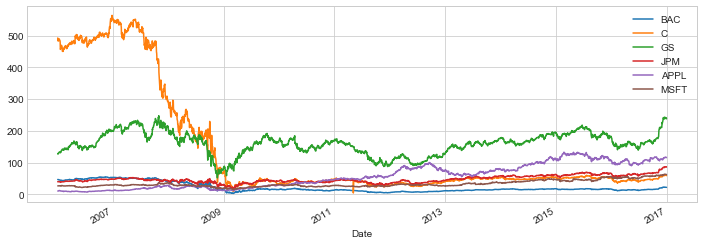

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

for tick in tckr_LIST:
    Stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

We See a sharp fall in the Stocks of citi bank in 2009 as compared to a stable market. This sharp fall was due to the recession and as banking was the worst affected sector we see banking stocks dipping to all time lows.

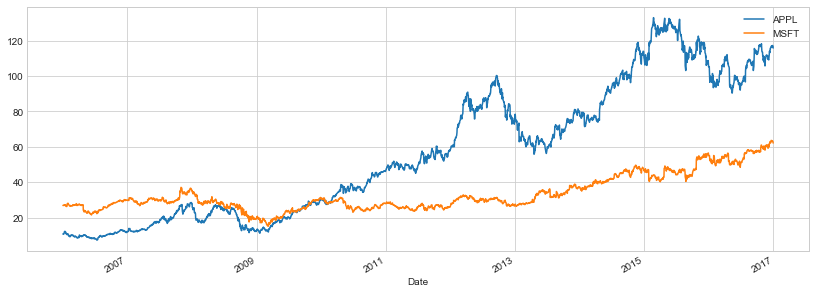

In [138]:
companyList = ['APPL','MSFT']
for company in companyList:
    Stocks[company]['Close'].plot(label=company,figsize=(14,5))
plt.legend()
plt.show()

Apple appointed Steve jobs back as CEO in the year 2010 and thats when the stocks started to rise and Iphone 4 took the market by storm with apple selling 14.1 million in Q3 of 2010 #source-Wikipedia

In [123]:
Stocks.xs(key='Close',axis=1,level='Company Stock Info').max()

Ticker
BAC      54.90
C       564.10
GS      247.92
JPM      87.13
APPL    133.00
MSFT     63.62
dtype: float64

#CALCULATING DAILY RETURNS ON THE STOCKS

In [124]:
StockReturns = pd.DataFrame()

In [126]:
for tick in tckr_LIST:
    StockReturns[tick+' Return'] = Stocks[tick]['Close'].pct_change()
StockReturns.head()

,BAC Return,C Return,GS Return,JPM Return,APPL Return,MSFT Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.002809,0.004844
2006-01-05,0.001288,0.004961,-0.000393,0.003029,-0.007470,0.000742
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.025400,-0.002964
2006-01-09,0.000644,-0.004731,0.012030,0.016242,-0.003670,-0.001858


In [128]:
StockReturns.idxmin()

BAC Return    2009-01-20
C Return      2011-05-06
GS Return     2009-01-20
JPM Return    2009-01-20
APPL Return   2008-09-29
MSFT Return   2009-01-22
dtype: datetime64[ns]

In [129]:
StockReturns.idxmax()

BAC Return    2009-04-09
C Return      2011-05-09
GS Return     2008-11-24
JPM Return    2009-01-21
APPL Return   2008-10-13
MSFT Return   2008-10-13
dtype: datetime64[ns]

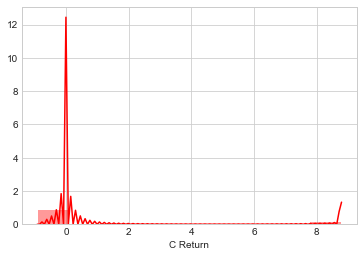

In [159]:
sns.distplot(StockReturns.ix['2011-05-01':'2011-05-10']['C Return'],color='red',bins=10)

we see a sudden hike in the Citi group share that was roughly 850% becuase citi did a reverse Split on that day taking the stock up

In [139]:
StockReturns.std()

BAC Return     0.035470
C Return       0.171685
GS Return      0.024695
JPM Return     0.026784
APPL Return    0.021063
MSFT Return    0.017479
dtype: float64

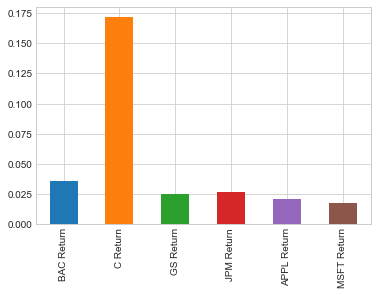

In [158]:
StockReturns.std().plot(kind='bar');


This Bar graph shows us that as a measure of standard deviation th Citi group share was one of the riskiest share to buy